# Import Libraries

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src")
from etl import load_data, transform_data, save_data

# Load the Dataset

In [60]:
df = load_data("../data/social_ads.csv")

In [61]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [62]:
df.isnull().sum() # check if there are null values

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [63]:
df.dtypes # identify the data types

Age                int64
EstimatedSalary    int64
Purchased          int64
dtype: object

In [64]:
df.duplicated().sum() # dont need to drop these records

33

# Transform Data

In [65]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [66]:
df['Age'].max()

60

In [67]:
df['Age'].min()

18

In [68]:
df['EstimatedSalary'].max()

150000

In [69]:
df['EstimatedSalary'].min()

15000

In [70]:
df_trans=transform_data(df)

In [71]:
df_trans.head()

,Age,EstimatedSalary,Purchased,AgeGroup,SalaryLevel
0,19,19000,0,18-25,Low
1,35,20000,0,26-35,Low
2,26,43000,0,26-35,Medium
3,27,57000,0,26-35,Medium
4,19,76000,0,18-25,High


# Save Data

In [72]:
save_data(df, "../output/social_ads_transformed.csv")

# Generate Insights

In [73]:
age_group_purchase = df_trans.groupby('AgeGroup')['Purchased'].mean()

In [74]:
salary_level_purchase = df_trans.groupby('SalaryLevel')['Purchased'].mean()

In [75]:
pivot = df_trans.pivot_table(values='Purchased', index='AgeGroup', columns='SalaryLevel', aggfunc='mean')

# Visualizations

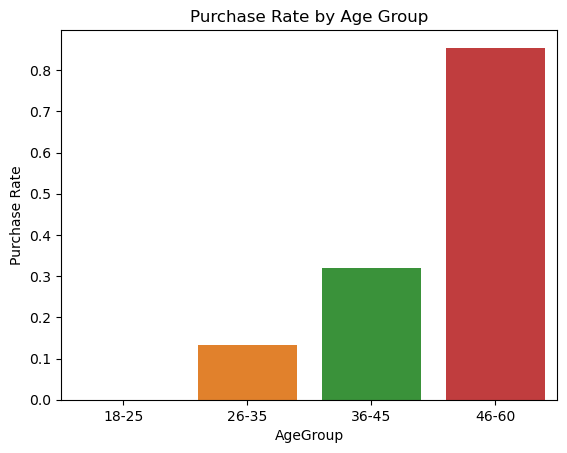

In [76]:
# Bar chart: Age Group
sns.barplot(x=age_group_purchase.index, y=age_group_purchase.values)
plt.title("Purchase Rate by Age Group")
plt.ylabel("Purchase Rate")
plt.savefig("../visuals/age_vs_purches_rate.png")

### Insights : 
- Individuals aged 36–45 and 46–60 show significantly higher purchase rates.
- Young adults (18–25) purchase much less.

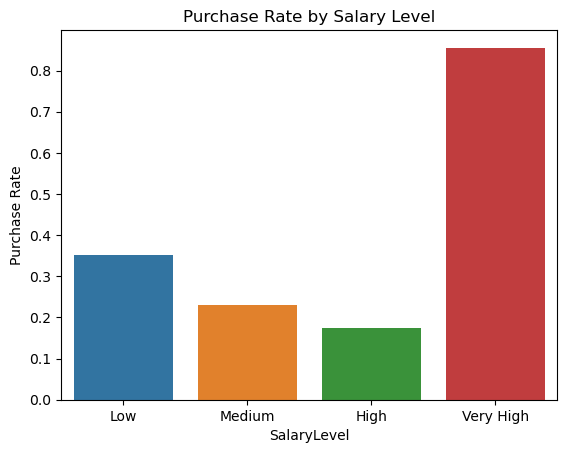

In [77]:
# Bar chart: Salary Level
sns.barplot(x=salary_level_purchase.index, y=salary_level_purchase.values)
plt.title("Purchase Rate by Salary Level")
plt.ylabel("Purchase Rate")
plt.savefig("../visuals/salary_vs_purches_rate.png")

## Insights : 
- Purchase probability increases with salary
- But Low salary people are tends to purches significantly.

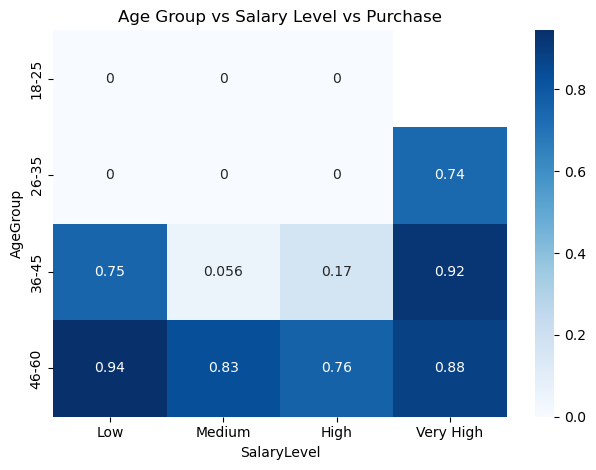

In [78]:
# Heatmap
sns.heatmap(pivot, annot=True, cmap="Blues")
plt.title("Age Group vs Salary Level vs Purchase")

plt.tight_layout()
plt.savefig("../visuals/Age_Group_vs_Salary_Level_vs_Purchase.png")
plt.show()

## Insights : 
- Best performing segment: 36–45 or 46–60 with High or Very High salaries.
- Weakest segment: 18–25

In [79]:
correlation = df['Age'].corr(df['EstimatedSalary'])

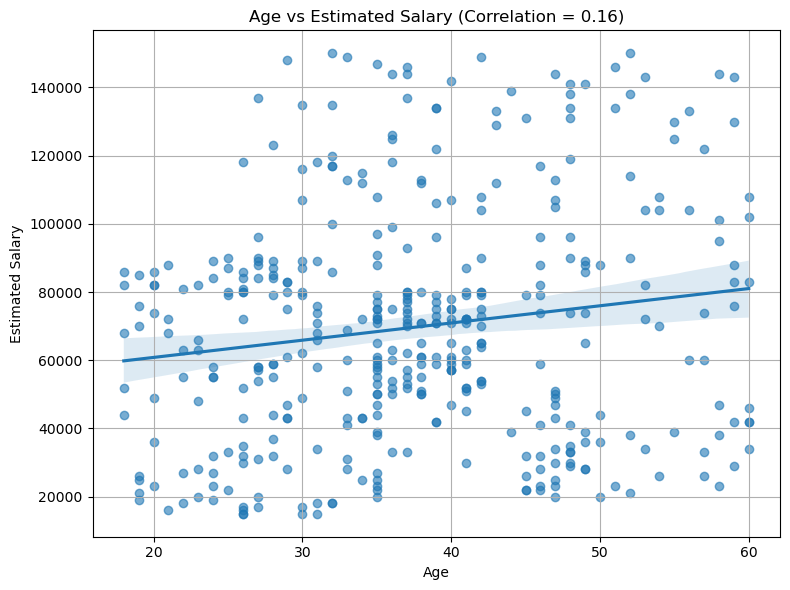

In [80]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Age', y='EstimatedSalary', data=df, scatter_kws={'alpha':0.6})
plt.title(f"Age vs Estimated Salary (Correlation = {correlation:.2f})")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.grid(True)
plt.tight_layout()
plt.savefig('../visuals/age_vs_estimated_salary.png')
plt.show()

## Insights : 
- As Age increases, Estimated Salary tends to increase slightly
- But the relationship is not strong or highly predictive

In [81]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

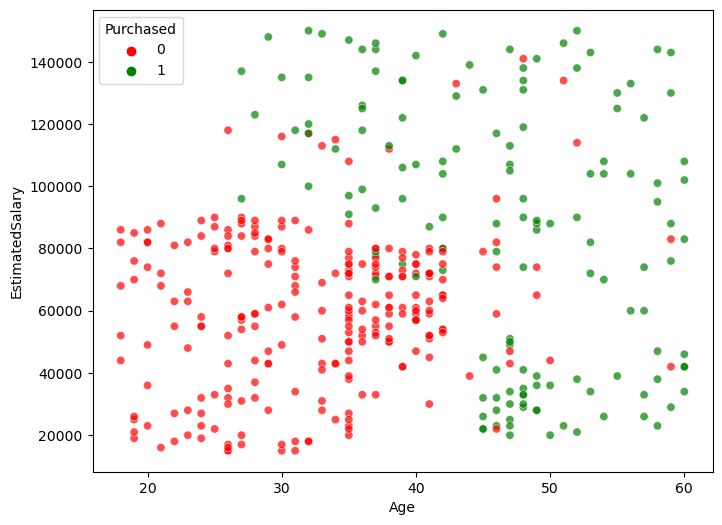

In [82]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='Age',
    y='EstimatedSalary',
    hue='Purchased',           # Use Purchased as legend (0 or 1)
    palette={0: 'red', 1: 'green'},
    alpha=0.7,
    data=df
)
plt.savefig('../visuals/age_vs_estimated_salary_vs_purchase.png')

# Insights : 
- Individuals who purchased the item (green dots) are more concentrated in the older age and higher salary range.